[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11KxvtvXP9s6sQC5YPsIZhB-YkIbEEoBo?usp=sharing)

# Final Project Kelompok 9 - Regresi ANN
1. 05111940000044 - Aulia Eka Putri Aryani
2. 05111940000063 - Ryan Garnet Andrianto
3. 05111940000176 - Lathifa Itqonina Mardiyati

dataset : https://www.kaggle.com/arslanali4343/real-estate-dataset/


In [ ]:
import pandas as pd

# Dataset file name
INPUT_FILE = 'data.csv' 

# Import dataset
df = pd.read_csv(INPUT_FILE, header = 0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA 

In [ ]:
# Ukuran data (banyak data, kolom)
df.shape

(511, 14)

In [ ]:
# Null value dan Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [ ]:
# Data dengan missing value
df[pd.isnull(df['RM']) ] 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [ ]:
# Informasi statistik
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


## Data Preprocessing

### Drop Missing Values

In [ ]:
# Menghapus data yang memiliki missing value
df.dropna(axis=0, how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


### Data Splitting

In [ ]:
# Header
headers = list(df.columns.values)
print(headers)

# X
X = df.iloc[:, 1:14]
print(X)

# Y
Y = df.iloc[:, 0]
print(Y)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
       ZN  INDUS  CHAS    NOX     RM  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    18.0   2.31     0  0.538  6.575  ...  296     15.3  396.90   4.98  24.0
1     0.0   7.07     0  0.469  6.421  ...  242     17.8  396.90   9.14  21.6
2     0.0   7.07     0  0.469  7.185  ...  242     17.8  392.83   4.03  34.7
3     0.0   2.18     0  0.458  6.998  ...  222     18.7  394.63   2.94  33.4
4     0.0   2.18     0  0.458  7.147  ...  222     18.7  396.90   5.33  36.2
..    ...    ...   ...    ...    ...  ...  ...      ...     ...    ...   ...
506   0.0  12.50     0  0.561  6.980  ...  320     23.0  396.00  12.00  12.0
507   0.0  12.50     0  0.561  6.980  ...  320     23.0  343.00  25.00  32.0
508   0.0  12.50     0  0.561  6.123  ...  320     23.0  343.00  21.00  54.0
509   0.0  12.70     0  0.561  6.222  ...  329     23.0  343.00  76.00  67.0
510   0.0  12.80     0  0.561  6.760  ...  345 

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, train_size=0.8, random_state=18)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=18)

### Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Data Processing

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings

# Fungsi objective
class FP_Utils:
  @staticmethod
  def getMSE(lr, epoch, solv, neuron, x_train, y_train, x_val, y_val):
    mlp_model = MLPRegressor(hidden_layer_sizes=(neuron,), solver=solv, learning_rate_init=lr, max_iter=epoch, shuffle=False)
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      mlp_model.fit(x_train, y_train)
    y_pred = mlp_model.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

### Tanpa PSO

In [ ]:
# Test 1: ANN without PSO nor Hill Climbing

print(FP_Utils.getMSE(0.001, 200, 'adam', 200, X_train, Y_train, X_val, Y_val))

13.454217813303629


### Dengan PSO

In [ ]:
import math
import numpy as np

# Constants
MIN_LEARNING_RATE = 0.00001
MAX_LEARNING_RATE = 1.0
MIN_EPOCH = 100
MAX_EPOCH = 900

# Class agent PSO
class PSO_Agent:
  def __init__(self, learning_rate, epoch):
    self.position = np.array([learning_rate, epoch])
    self.pbest_position = self.position # pbest mula-mula adalah dirinya sendiri
    self.pbest_value = float('inf')
    self.velocity = np.array([0, 0]) # Velocity mula-mula adalah 0
    self.position_history = []
    self.mse_history = []
    self.pbest_position_history = []
    self.pbest_value_history = []
  def move(self):
    # Agent berpindah
    self.position += self.velocity
    # Pembatasan range learning rate dan epoch
    self.limitSet()
  def limitSet(self):
    if self.position[0] < MIN_LEARNING_RATE: self.position[0] = MIN_LEARNING_RATE
    elif self.position[0] > MAX_LEARNING_RATE: self.position[0] = MAX_LEARNING_RATE

    if self.position[1] < MIN_EPOCH: self.position[1] = MIN_EPOCH
    elif self.position[1] > MAX_EPOCH: self.position[1] = MAX_EPOCH

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Hyper-parameter
c1 = 1
c2 = 3

class Space:
  def __init__(self, target, target_error):
    self.n_agents = 0
    self.agents = []
    self.target = target
    self.target_error = target_error
    self.gbest_value = float('inf')
    self.gbest_position = np.array([0, 0])
  def add_agent(self, agent):
    # Tambah agent baru
    self.agents.append(agent)
    self.n_agents += 1
  def print_agents(self):
    # Print status agents
    for i, agent in enumerate(self.agents):
      position = agent.position.copy()
      value = self.objective_function(agent)
      print(f'Agent {i}: ({agent.position[0], agent.position[1]}) = {value}')
      agent.position_history.append(position)
      agent.mse_history.append(value)      
  def objective_function(self, agent):
    learning_rate = agent.position[0]
    epoch = int(agent.position[1]) # Epoch dibulatkan karena harus integer
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      mse_value = FP_Utils.getMSE(learning_rate, epoch, 'sgd', 300, X_train, Y_train, X_val, Y_val)
    return mse_value
  def set_pbest(self):
    for agent in self.agents:
      agent_candidate = self.objective_function(agent)
      if agent.pbest_value > agent_candidate:
        agent.pbest_value = agent_candidate
        agent.pbest_position = agent.position.copy()
      agent.pbest_value_history.append(agent.pbest_value.copy())
      agent.pbest_position_history.append(agent.pbest_position.copy())
  def set_gbest(self):
    for agent in self.agents:
      best_agent_candidate = self.objective_function(agent)
      if self.gbest_value > best_agent_candidate:
        self.gbest_value = best_agent_candidate
        self.gbest_position = agent.position.copy()
  def move_agents(self):
    # Semua agent berpindah
    for agent in self.agents:
        new_velocity = agent.velocity + c1*random.random()*(agent.pbest_position - agent.position) + c2*random.random()*(self.gbest_position - agent.position)
        agent.velocity = new_velocity
        agent.move()
  def plot(self, it):
    plt.figure(figsize=(20, 12))
    color = ['b', 'g', 'r', 'm', 'y', 'k']
    for i, agent in enumerate(self.agents):
      agent_label = 'agent ' + str(i)
      plt.plot(range(1, it), agent.mse_history, color[i], label = agent_label)
      plt.plot(range(1, it), agent.mse_history, color[i], marker="o")
      pbest_agent_label = 'pbest agent ' + str(i)
      plt.plot(range(1, it), agent.pbest_value_history, color[i], label = pbest_agent_label, linestyle='--')
      for j in range(it-1):
        position_label = "({:.3f}, {:.0f})".format(agent.position_history[j][0], agent.position_history[j][1])
        plt.annotate(position_label,              # this is the text
                    (j+1, agent.mse_history[j]),  # these are the coordinates to position the label
                    textcoords="offset points",   # how to position the text
                    xytext=(0, 5),                # distance from text to points (x,y)
                    ha='center')                  # horizontal alignment can be left, right or center
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.xticks(range(1, it))
    plt.show()

#### Tanpa Hill Climbing

[Iterasi Ke-1]
Agent 0: ((0.001, 120.0)) = 13.9957573143898
Agent 1: ((0.2, 140.0)) = 35.05264417749706
Agent 2: ((0.005, 160.0)) = 8.530179379917676
Agent 3: ((0.02, 180.0)) = 13.514574536343583
Agent 4: ((0.505, 200.0)) = 37.88564206052851
[Iterasi Ke-2]
Agent 0: ((0.0022945436217514754, 132.94543621751475)) = 11.747873863210938
Agent 1: ((1e-05, 163.54279319592408)) = 37.43171210042842
Agent 2: ((0.005, 160.0)) = 8.642578279098373
Agent 3: ((1e-05, 152.2804348547796)) = 38.464138270031775
Agent 4: ((1e-05, 100.0)) = 38.96838247095923
[Iterasi Ke-3]
Agent 0: ((0.010232144767823154, 212.32144767823155)) = 11.531918474571807
Agent 1: ((1e-05, 182.4042304781)) = 35.89937693693209
Agent 2: ((0.005, 160.0)) = 8.598707533035856
Agent 3: ((0.002045681521068849, 158.53257368668002)) = 11.56425301661204
Agent 4: ((1e-05, 175.62746605604957)) = 34.9284112277193
[Iterasi Ke-4]
Agent 0: ((0.010419059718145007, 214.19059718145007)) = 11.57302901061337
Agent 1: ((1e-05, 158.01546466501716)) = 38.0

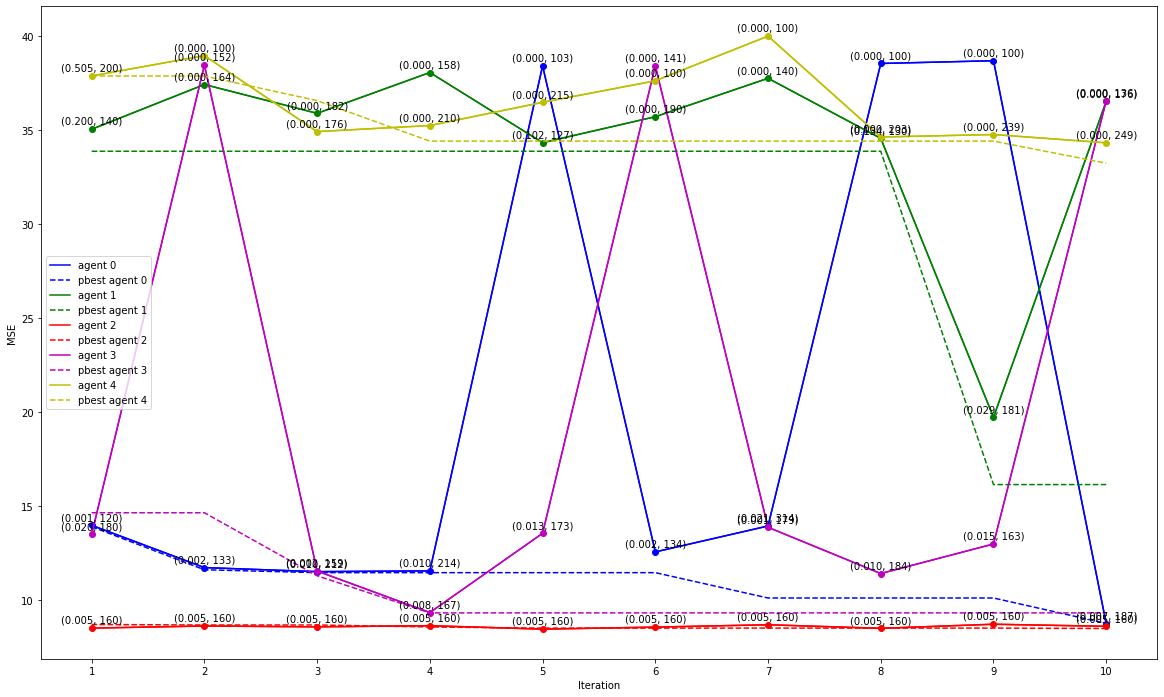

[Hasil Akhir PSO]
Learning rate = 0.005
Epoch = 160.0
MSE = 8.486108172493902


In [ ]:
def startDiscovery():
  # Konstanta
  TARGET_MSE = 5
  TARGET_MSE_ERROR = 3
  MAX_ITERATION = 10 # Banyak iterasi PSO

  # Instansiasi space PSO
  discovery_space = Space(TARGET_MSE, TARGET_MSE_ERROR)

  # Tambah agent-agent
  discovery_space.add_agent(PSO_Agent(0.001, MIN_EPOCH+20))
  discovery_space.add_agent(PSO_Agent(0.200, MIN_EPOCH+40))
  discovery_space.add_agent(PSO_Agent(0.005, MIN_EPOCH+60))
  discovery_space.add_agent(PSO_Agent(0.020, MIN_EPOCH+80))
  discovery_space.add_agent(PSO_Agent(0.505, MIN_EPOCH+100))

  it = 1
  while it <= MAX_ITERATION:
    print(f'[Iterasi Ke-{it}]')
    discovery_space.set_pbest()
    discovery_space.set_gbest()
    if abs(discovery_space.gbest_value - discovery_space.target) <= discovery_space.target_error:
      break
    discovery_space.print_agents()
    discovery_space.move_agents()
    # discovery_space.plot(it)
    it += 1

  # visualisasi
  discovery_space.plot(it)

  print('[Hasil Akhir PSO]')
  print(f'Learning rate = {discovery_space.gbest_position[0]}')
  print(f'Epoch = {discovery_space.gbest_position[1]}')
  print(f'MSE = {discovery_space.gbest_value}')

startDiscovery()

#### Dengan Hill Climbing

**Merge dua vektor**

Vektor kecepatan Hill Climb

Jika agent bergerak dari titik $A(a_1,a_2)$ menuju $B(b_1, b_2)$, maka

$x_{1,1} = b_1 - a_1$

$x_{1,2} = b_2 - a_2$

$$ v_1 =
\begin{bmatrix}
x_{1,1} \\
x_{1,2}
\end{bmatrix}
$$

Vektor Kecepatan PSO

$$ v_2 =
\begin{bmatrix}
x_{2,1} \\
x_{2,1}
\end{bmatrix}
$$

Vektor Resultan

$$ v_R = v_1 + v_2 = \begin{bmatrix}
x_{1,1} \\
x_{1,2}
\end{bmatrix} + \begin{bmatrix}
x_{2,1} \\
x_{2,2}
\end{bmatrix} = \begin{bmatrix}
x_{1,1} + x_{2,1} \\
x_{1,2} + x_{2,2}
\end{bmatrix}
$$

Rata-rata panjang vektor v1 dan v2
$$
\frac{|v_1|+|v_2|}{2} = \frac{\sqrt{x_{1,1}^2 + x_{1,2}^2} + \sqrt{x_{2,1}^2+x_{2,2}^2}}{2}
$$

Unit vektor

$$
^{v_R} = \frac{v_R}{|v_R|} 
$$

Vektor Final

$$
v_{final} = ^{v_R} \frac{|v_1|+|v_2|}{2}
$$

In [ ]:
import numpy as np

# Fungsi untuk rata-rata dua vektor
def merge2Vector(v1, v2):
  norm_v1 = np.linalg.norm(v1)          # Panjang vektor v1
  norm_v2 = np.linalg.norm(v2)          # Panjang vektor v2
  norm_mean = (norm_v1 + norm_v2) / 2   # Mean panjang vektor v1 dan v2
  vr = v1 + v2                          # Vektor resultan
  norm_vr = np.linalg.norm(vr)          # Panjang vektor resultan
  vr_unit = vr / norm_vr                # Unit vektor resultan
  vr_final = vr_unit * norm_mean        # Vektor resultan dengan panjang rata-rata dari v1 dan v2
  return vr_final

In [ ]:
import numpy as np

# Fungsi untuk membuat vektor dari 2 titik p1 dan p2
def toVector(p1, p2):
  return p2 - p1

In [ ]:
class PSO_Agent_HillClimb(PSO_Agent):
  def move(self):
    super().move()
    self.doHillClimb()
  def doHillClimb(self):
    # Konstanta
    STEP_SIZE_LEARNING_RATE = 0.001
    STEP_SIZE_EPOCH = 2

    curr_mse = FP_Utils.getMSE(self.position[0], int(self.position[1]), 'sgd', 300, X_train, Y_train, X_val, Y_val)
    anyBetter = True

    # Loop akan berhenti ketika hill climb tidak menemukan solusi optimal
    while anyBetter:
      anyBetter = False
      
      # Go forward
      new_position = self.position + np.array([STEP_SIZE_LEARNING_RATE, 0])

      if new_position[0] < MIN_LEARNING_RATE: new_position[0] = MIN_LEARNING_RATE
      elif new_position[0] > MAX_LEARNING_RATE: new_position[0] = MAX_LEARNING_RATE
      if new_position[1] < MIN_EPOCH: new_position[1] = MIN_EPOCH
      elif new_position[1] > MAX_EPOCH: new_position[1] = MAX_EPOCH

      print(f'TESTING WITH getMSE = {new_position[0]} and {new_position[1]}')
      temp_mse = FP_Utils.getMSE(new_position[0], int(new_position[1]), 'sgd', 300, X_train, Y_train, X_val, Y_val)
      
      if temp_mse < curr_mse:
        print(f'BETTER POSITION DETECTED: BEFORE = {curr_mse} AFTER = {temp_mse}')
        # Update vektor kecepatan agent
        self.velocity = merge2Vector(toVector(self.position, new_position), self.velocity)
        self.position = new_position
        curr_mse = temp_mse
        anyBetter = True
        break;

      # Go backward
      new_position = self.position + np.array([-STEP_SIZE_LEARNING_RATE, 0])

      if new_position[0] < MIN_LEARNING_RATE: new_position[0] = MIN_LEARNING_RATE
      elif new_position[0] > MAX_LEARNING_RATE: new_position[0] = MAX_LEARNING_RATE
      if new_position[1] < MIN_EPOCH: new_position[1] = MIN_EPOCH
      elif new_position[1] > MAX_EPOCH: new_position[1] = MAX_EPOCH

      print(f'TESTING WITH getMSE = {new_position[0]} and {new_position[1]}')
      temp_mse = FP_Utils.getMSE(new_position[0], int(new_position[1]), 'sgd', 300, X_train, Y_train, X_val, Y_val)
      
      if temp_mse < curr_mse:
        print(f'BETTER POSITION DETECTED: BEFORE = {curr_mse} AFTER = {temp_mse}')
        # Update vektor kecepatan agent
        self.velocity = merge2Vector(toVector(self.position, new_position), self.velocity)
        self.position = new_position
        curr_mse = temp_mse
        anyBetter = True
        break;
      
      # Go left
      new_position = self.position + np.array([0, -STEP_SIZE_EPOCH])

      if new_position[0] < MIN_LEARNING_RATE: new_position[0] = MIN_LEARNING_RATE
      elif new_position[0] > MAX_LEARNING_RATE: new_position[0] = MAX_LEARNING_RATE
      if new_position[1] < MIN_EPOCH: new_position[1] = MIN_EPOCH
      elif new_position[1] > MAX_EPOCH: new_position[1] = MAX_EPOCH

      print(f'TESTING WITH getMSE = {new_position[0]} and {new_position[1]}')
      temp_mse = FP_Utils.getMSE(new_position[0], int(new_position[1]), 'sgd', 300, X_train, Y_train, X_val, Y_val)
      
      if temp_mse < curr_mse:
        print(f'BETTER POSITION DETECTED: BEFORE = {curr_mse} AFTER = {temp_mse}')
        # Update vektor kecepatan agent
        self.velocity = merge2Vector(toVector(self.position, new_position), self.velocity)
        self.position = new_position
        curr_mse = temp_mse
        anyBetter = True
        break;
      
      # Go right
      new_position = self.position + np.array([0, STEP_SIZE_EPOCH])

      if new_position[0] < MIN_LEARNING_RATE: new_position[0] = MIN_LEARNING_RATE
      elif new_position[0] > MAX_LEARNING_RATE: new_position[0] = MAX_LEARNING_RATE
      if new_position[1] < MIN_EPOCH: new_position[1] = MIN_EPOCH
      elif new_position[1] > MAX_EPOCH: new_position[1] = MAX_EPOCH

      print(f'TESTING WITH getMSE = {new_position[0]} and {new_position[1]}')
      temp_mse = FP_Utils.getMSE(new_position[0], int(new_position[1]), 'sgd', 300, X_train, Y_train, X_val, Y_val)
      if temp_mse < curr_mse:
        print(f'BETTER POSITION DETECTED: BEFORE = {curr_mse} AFTER = {temp_mse}')
        # Update vektor kecepatan agent
        self.velocity = merge2Vector(toVector(self.position, new_position), self.velocity)
        self.position = new_position
        curr_mse = temp_mse
        anyBetter = True
        break;

    if self.pbest_value > curr_mse:
      self.pbest_position = self.position
      self.pbest_value = curr_mse

[Iterasi Ke-1]
Agent 0: ((0.001, 120.0)) = 14.01068729047648
Agent 1: ((0.2, 140.0)) = 34.85779810358861
Agent 2: ((0.005, 160.0)) = 8.514742577575575
Agent 3: ((0.02, 180.0)) = 13.416920211760358
Agent 4: ((0.505, 200.0)) = 37.88600594041267
TESTING WITH getMSE = 0.009227172985543996 and 192.27172985543996
TESTING WITH getMSE = 0.007227172985543997 and 192.27172985543996
BETTER POSITION DETECTED: BEFORE = 10.821149852189015 AFTER = 9.423169640966554
TESTING WITH getMSE = 0.00101 and 199.8857720620908
BETTER POSITION DETECTED: BEFORE = 35.5692239287409 AFTER = 13.37646905791447
TESTING WITH getMSE = 0.006 and 160.0
BETTER POSITION DETECTED: BEFORE = 8.593090585210387 AFTER = 8.509501780242983
TESTING WITH getMSE = 0.00101 and 138.38906514683222
BETTER POSITION DETECTED: BEFORE = 39.59185519914787 AFTER = 13.65269150770257
TESTING WITH getMSE = 0.1981153544331199 and 175.36922835464958
TESTING WITH getMSE = 0.1961153544331199 and 175.36922835464958
TESTING WITH getMSE = 0.19711535443311

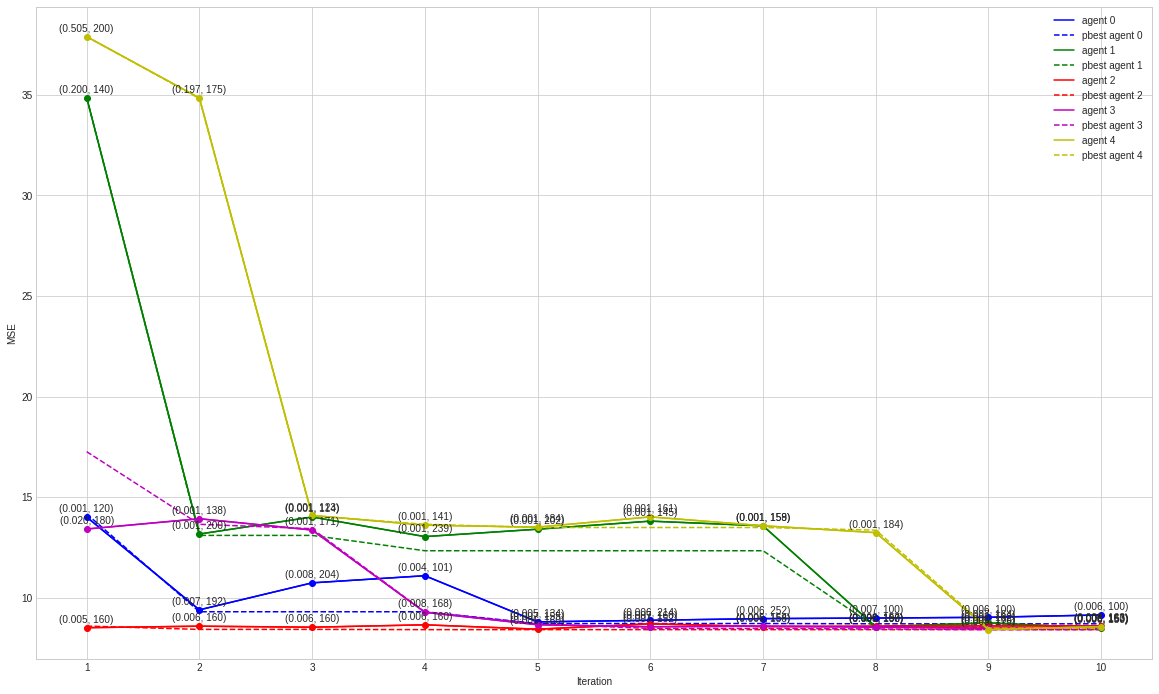

[Hasil Akhir PSO Hill Climb]
Learning rate = 0.005356706792056152
Epoch = 162.25787694354375
MSE = 8.412086997287725


In [ ]:
def startDiscoveryHillClimb():
  # Konstanta
  TARGET_MSE = 5
  TARGET_MSE_ERROR = 3
  MAX_ITERATION = 10 # Banyak iterasi PSO

  # Instansiasi space PSO
  discovery_space = Space(TARGET_MSE, TARGET_MSE_ERROR)

  # Tambah agent-agent
  discovery_space.add_agent(PSO_Agent_HillClimb(0.001, MIN_EPOCH+20))
  discovery_space.add_agent(PSO_Agent_HillClimb(0.200, MIN_EPOCH+40))
  discovery_space.add_agent(PSO_Agent_HillClimb(0.005, MIN_EPOCH+60))
  discovery_space.add_agent(PSO_Agent_HillClimb(0.020, MIN_EPOCH+80))
  discovery_space.add_agent(PSO_Agent_HillClimb(0.505, MIN_EPOCH+100))

  it = 1
  while it <= MAX_ITERATION:
    print(f'[Iterasi Ke-{it}]')
    discovery_space.set_pbest()
    discovery_space.set_gbest()
    if abs(discovery_space.gbest_value - discovery_space.target) <= discovery_space.target_error:
      break
    discovery_space.print_agents()
    discovery_space.move_agents()
    # discovery_space.plot(it)
    it += 1

  discovery_space.plot(it)

  print('[Hasil Akhir PSO Hill Climb]')
  print(f'Learning rate = {discovery_space.gbest_position[0]}')
  print(f'Epoch = {discovery_space.gbest_position[1]}')
  print(f'MSE = {discovery_space.gbest_value}')

startDiscoveryHillClimb()

## Data Predict

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings

# Fungsi prediction
class FP_Utils_Predict:
  @staticmethod
  def getPredict(lr, epoch, solv, neuron, x_train, y_train, x_test, y_test):
    mlp_model = MLPRegressor(hidden_layer_sizes=(neuron,), solver=solv, learning_rate_init=lr, max_iter=epoch, shuffle=False)
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      mlp_model.fit(x_train, y_train)
    y_pred = mlp_model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print('Predict')
    print('MSE:', mse)

    return y_pred

### Tanpa PSO

Predict
MSE: 8.281075167265497


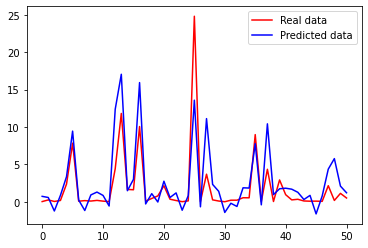

In [ ]:
import matplotlib.pyplot as plt

FINAL_LEARNING_RATE = 0.001 # Default sklearn 
FINAL_EPOCH = 200           # Default sklearn

Y_pred = FP_Utils_Predict.getPredict(FINAL_LEARNING_RATE, FINAL_EPOCH, 'adam', 200, X_train, Y_train, X_test, Y_test)
Y_test_visual = Y_test.copy()
Y_test_visual.reset_index(drop = True, inplace=True)

plt.plot(Y_test_visual, color = 'red', label = 'Real data')
plt.plot(Y_pred, color = 'blue', label = 'Predicted data')
plt.legend()
plt.show()

### Dengan PSO

#### Tanpa Hill Climbing

Predict
MSE: 3.811896328231355


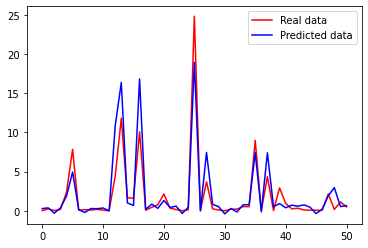

In [ ]:
import matplotlib.pyplot as plt

FINAL_LEARNING_RATE = 0.005 # PSO 10 Des 2021
FINAL_EPOCH = 160           # PSO 10 Des 2021

Y_pred = FP_Utils_Predict.getPredict(FINAL_LEARNING_RATE, FINAL_EPOCH, 'sgd', 300, X_train, Y_train, X_test, Y_test)
Y_test_visual = Y_test.copy()
Y_test_visual.reset_index(drop = True, inplace=True)

plt.plot(Y_test_visual, color = 'red', label = 'Real data')
plt.plot(Y_pred, color = 'blue', label = 'Predicted data')
plt.legend()
plt.show()

#### Dengan Hill Climbing

Predict
MSE: 3.71470838503202


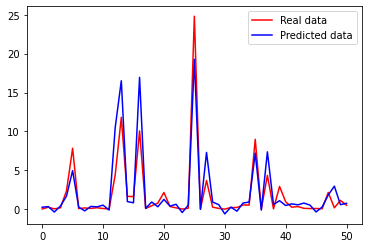

In [ ]:
import matplotlib.pyplot as plt

FINAL_LEARNING_RATE = 0.005356706792056152  # PSO + Hill Climbing 10 Des 2021
FINAL_EPOCH = 162                           # PSO + Hill Climbing 10 Des 2021

Y_pred = FP_Utils_Predict.getPredict(FINAL_LEARNING_RATE, FINAL_EPOCH, 'sgd', 300, X_train, Y_train, X_test, Y_test)
Y_test_visual = Y_test.copy()
Y_test_visual.reset_index(drop = True, inplace=True)

plt.plot(Y_test_visual, color = 'red', label = 'Real data')
plt.plot(Y_pred, color = 'blue', label = 'Predicted data')
plt.legend()
plt.show()